 ## This project aims to predict the price of a car with two different methods, the classic machine learning method with Sklearn and the Deep neural network with TensorFlow.

### **Machine learning**

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset.

In [2]:
data = pd.read_csv('car_price.csv')
data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

Becoming one with the data

In [3]:
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [4]:
data.info()
# This table provides some information about the data, like the type of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### **Data Preprocessing**

*Missing Data*

In [5]:
# let's check Null data
data.isnull().sum()
# There are 172 missing data for Price and 150 for EngineeV.

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
#creating a copy of data
data_without_null = data.copy()

In [7]:
# now we need to remove these missing data
data_without_null = data_without_null.dropna(axis=0)

In [8]:
# check the information of the data
data_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [9]:
# check missing data
data_without_null.isnull().sum()
# good! we do not have any missing data.

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Studying the outliers of each feature.

In [10]:
# the method below is to study the outliers by plotting the probability distribution functions.
import seaborn as sns # seeborn has a handy function to draw the probability.

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

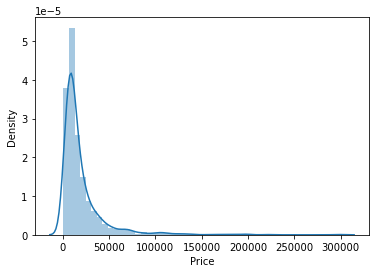

In [11]:
sns.distplot(data_without_null['Price'])
# for the car's price, the outliers are located on the right side of the plot related to the expensive cars.

In [12]:
#let's remove the one percent of the price from rght-side of the graph
q_price = data_without_null['Price'].quantile(0.99) # q_price is a variable equal to 99% of the price.
data_pre_process_1 = data_without_null[data_without_null['Price']<q_price] # I apply the above condition to the data
data_pre_process_1.describe() # the number of data decreases from 4025 to 3984

Price      Mileage      EngineV         Year
count    3984.000000  3984.000000  3984.000000  3984.000000
mean    17837.117460   165.116466     2.743770  2006.292922
std     18976.268315   102.766126     4.956057     6.672745
min       600.000000     0.000000     0.600000  1969.000000
25%      6980.000000    93.000000     1.800000  2002.750000
50%     11400.000000   160.000000     2.200000  2007.000000
75%     21000.000000   230.000000     3.000000  2011.000000
max    129222.000000   980.000000    99.990000  2016.000000

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

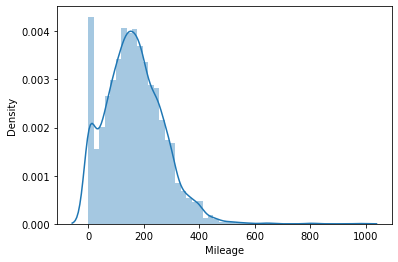

In [13]:
# plotting data for Mileage.
sns.distplot(data_pre_process_1['Mileage'])
#in this case, the data larger than 600 is almost outliers.

In [14]:
# the same method for Mileage.
q_mileage = data_pre_process_1['Mileage'].quantile(0.998) # q_mileage is a variable equal to 99.8% of the milage.
data_pre_process_2 = data_pre_process_1[data_pre_process_1['Mileage']<q_mileage] # I apply the above condition to the data
data_pre_process_2.describe() # we have just lost 8 data points in this case.

Price      Mileage      EngineV        Year
count    3976.000000  3976.000000  3976.000000  3976.00000
mean    17827.760553   164.021378     2.743984  2006.29326
std     18969.098290    99.747787     4.960888     6.67514
min       600.000000     0.000000     0.600000  1969.00000
25%      6950.000000    93.000000     1.800000  2002.75000
50%     11400.000000   160.000000     2.200000  2007.00000
75%     21000.000000   230.000000     3.000000  2011.00000
max    129222.000000   550.000000    99.990000  2016.00000

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

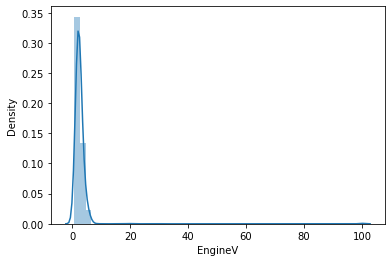

In [17]:
# let's check for EngineV
sns.distplot(data_pre_process_2['EngineV'])


In [18]:
data_pre_process_3 = data_pre_process_2[data_pre_process_2['EngineV']<8.5] # by a simple search on the internet we can find that 
#the maximum engine volume is 8.5 L. then, we remove higher than this value.

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

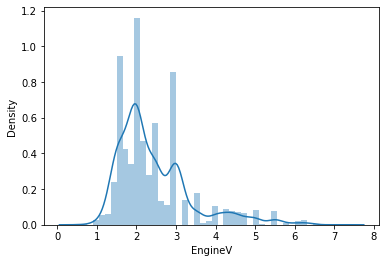

In [19]:
sns.distplot(data_pre_process_3['EngineV'])


In [20]:
data_pre_process_3.describe() # in this stage, we removed 21 data points.

Price      Mileage      EngineV         Year
count    3955.000000  3955.000000  3955.000000  3955.000000
mean    17883.754731   163.821997     2.444539  2006.310240
std     19000.070217    99.790315     0.949575     6.674496
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    93.000000     1.800000  2003.000000
50%     11500.000000   159.000000     2.200000  2007.000000
75%     21250.000000   230.000000     3.000000  2011.000000
max    129222.000000   550.000000     7.200000  2016.000000

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

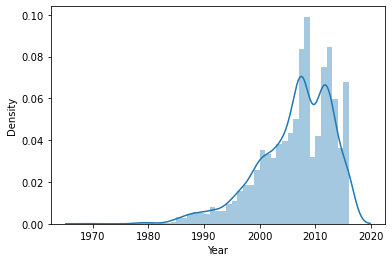

In [21]:
# now, we need to check the data for year.
sns.distplot(data_pre_process_3['Year'])
#the outliers are in the left side.

In [22]:
#we remove the data before 1980 to deal with the outliers.
data_pre_process_4 = data_pre_process_3[data_pre_process_3['Year']>1980]

In [23]:
data_pre_process_4.describe()

Price      Mileage      EngineV        Year
count    3946.000000  3946.000000  3946.000000  3946.00000
mean    17909.842172   163.814242     2.445198  2006.37481
std     19007.451559    99.665032     0.950242     6.54168
min       800.000000     0.000000     0.600000  1982.00000
25%      6999.250000    93.000000     1.800000  2003.00000
50%     11500.000000   159.000000     2.200000  2007.00000
75%     21300.000000   230.000000     3.000000  2011.00000
max    129222.000000   550.000000     7.200000  2016.00000

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

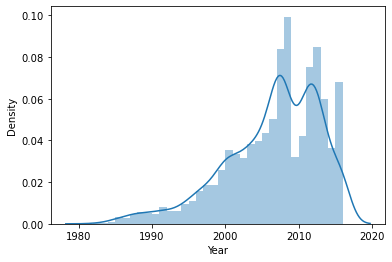

In [22]:
sns.distplot(data_pre_process_4['Year'])


In [24]:
# let's drop the column for the model of the car, as it does not play a critical role here, 
# and there are lots of models to make dummies in the following sections.
data_pre_process_4.head()
data_pre_process_4 = data_pre_process_4.drop(['Model'], axis=1)

In [25]:
data_pre_process_4.head()
data_pre_process_4.to_csv('data_prep.csv')

To solve a regression problem with statsmodel, there are five conditions that need to be satisfied. 
let's check these conditions

Text(0.5, 1.0, 'Price and Mileage')

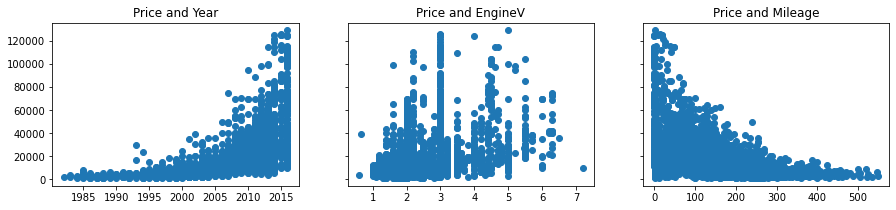

In [26]:
#let's visualize the data
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_pre_process_4['Year'],data_pre_process_4['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_pre_process_4['EngineV'],data_pre_process_4['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_pre_process_4['Mileage'],data_pre_process_4['Price'])
ax3.set_title('Price and Mileage')
#as the price is the y-axis for all three features, I used subplots.
#the data should be linear for linear regression, but this is not linear here. 
#one way to deal with this is to use the log of the price.
#let's check!

**Log of Price**

In [27]:
# I employ numpy to generate log of price, and then add to the dataframe.
log_price = np.log(data_pre_process_4['Price'])
data_log = data_pre_process_4.copy()
data_log['Price_log']= log_price

In [28]:
data_log.describe()

Price      Mileage      EngineV        Year    Price_log
count    3946.000000  3946.000000  3946.000000  3946.00000  3946.000000
mean    17909.842172   163.814242     2.445198  2006.37481     9.388547
std     19007.451559    99.665032     0.950242     6.54168     0.892498
min       800.000000     0.000000     0.600000  1982.00000     6.684612
25%      6999.250000    93.000000     1.800000  2003.00000     8.853558
50%     11500.000000   159.000000     2.200000  2007.00000     9.350102
75%     21300.000000   230.000000     3.000000  2011.00000     9.966462
max    129222.000000   550.000000     7.200000  2016.00000    11.769287

Text(0.5, 1.0, 'Price and Mileage')

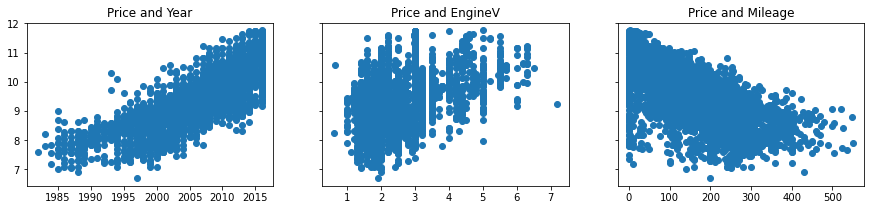

In [29]:
# now let's check if the log data works better.
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_log['Year'],data_log['Price_log'])
ax1.set_title('Price and Year')
ax2.scatter(data_log['EngineV'],data_log['Price_log'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_log['Mileage'],data_log['Price_log'])
ax3.set_title('Price and Mileage')
# it looks like this plots works well, and they are linear.

In [30]:
# let's drop the price column and work with the log_price.
data_pre_process_log = data_log.copy()

In [31]:
data_pre_process_log = data_pre_process_log.drop(['Price'], axis = 1)

In [32]:
data_pre_process_log.describe()

Mileage      EngineV        Year    Price_log
count  3946.000000  3946.000000  3946.00000  3946.000000
mean    163.814242     2.445198  2006.37481     9.388547
std      99.665032     0.950242     6.54168     0.892498
min       0.000000     0.600000  1982.00000     6.684612
25%      93.000000     1.800000  2003.00000     8.853558
50%     159.000000     2.200000  2007.00000     9.350102
75%     230.000000     3.000000  2011.00000     9.966462
max     550.000000     7.200000  2016.00000    11.769287

**Multicollinearity**

In [33]:
#let's check the Multicollinearity of the features.
# we can do it by using the variance inflation factor
#let's import this function.

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [34]:
# we check the multicollinearity for Mileage, Year, and EngineV.
input_vif = data_pre_process_log[['Mileage','Year','EngineV']]
[variance_inflation_factor(input_vif, i)  for i in range(input_vif.shape[1])]
# based on vif function, the feature with the highest value should be removed because it has the highest Multicollinearity.

[3.6747728213896065, 10.28327257722121, 7.623592506664658]

In [35]:
# let's drop year. 
data_pre_process_log = data_pre_process_log.drop(['Year'], axis = 1)

In [36]:
data_pre_process_log.head(7)

Brand       Body  Mileage  EngineV Engine Type Registration  \
0            BMW      sedan      277      2.0      Petrol          yes   
1  Mercedes-Benz        van      427      2.9      Diesel          yes   
2  Mercedes-Benz      sedan      358      5.0         Gas          yes   
3           Audi  crossover      240      4.2      Petrol          yes   
4         Toyota  crossover      120      2.0      Petrol          yes   
6            BMW      sedan      438      2.0         Gas          yes   
7           Audi      vagon      200      2.7      Diesel          yes   

   Price_log  
0   8.342840  
1   8.974618  
2   9.495519  
3  10.043249  
4   9.814656  
6   8.716044  
7   9.560997

## Dummy Variables and Scaled the dataset

It's time to deal with the dummy variables and scaled the dataset.

In [37]:
data_dummies = data_pre_process_log.copy()

In [41]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [42]:
data_dummies.head()

Brand       Body  Mileage  EngineV Engine Type Registration  \
0            BMW      sedan      277      2.0      Petrol          yes   
1  Mercedes-Benz        van      427      2.9      Diesel          yes   
2  Mercedes-Benz      sedan      358      5.0         Gas          yes   
3           Audi  crossover      240      4.2      Petrol          yes   
4         Toyota  crossover      120      2.0      Petrol          yes   

   Price_log  
0   8.342840  
1   8.974618  
2   9.495519  
3  10.043249  
4   9.814656

In [43]:
ct = make_column_transformer(
    (MinMaxScaler(), ["Mileage", "EngineV"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Brand","Body", "Engine Type", "Registration"])
)

# Create X & y
X = data_dummies.drop("Price_log", axis=1)
y = data_dummies["Price_log"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

## LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
# we have imported the linear regression from sklearn.

In [47]:
#let's fit the data to LinearRegression model as the first ML method.
reg = LinearRegression()
#fit the training data to the machine learning algorihm.
#the test data should remain unseen by the machine.
reg.fit(X_train_normal,y_train)

LinearRegression()

In [49]:
# let's evaluate model on the training set.
reg.score(X_test_normal, y_test)

0.754517243513629

In [50]:
#let's compare the prediction set with the true sets by visualization.
y_pred = reg.predict(X_test_normal)
#this function applies the prediction on the training set.

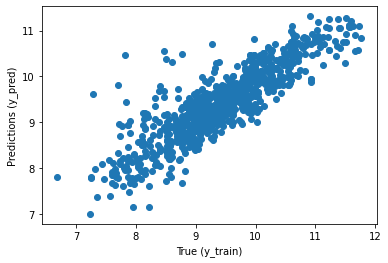

In [52]:
# now, lets visualize.
plt.scatter(y_test, y_pred)
plt.xlabel('True (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()
# it is almost good.

## Random Forest Regressor

In [53]:
# now we are going to fit the data to the different algorithm which is Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train_normal, y_train)

RandomForestRegressor()

In [54]:
#lets evaluate on the train set
regr.score(X_test_normal,y_test)

0.8037027763140303

Wow! without making any changes to the data preprocessing, we could increase the model's accuracy by 5% in the test dataset.

Now, we are improving the experiment by tuning hyperparameters.

In [55]:
# we attempt to change the numbers of n-estimators to see different outcomes.
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    regr_1 = RandomForestRegressor(n_estimators=i).fit(X_train_normal, y_train)
    print(f"accruacy on the test data set: {regr_1.score(X_test_normal, y_test)}")
    print("")

Trying model with 10 estimators...
accruacy on the test data set: 0.7881889278837874

Trying model with 20 estimators...
accruacy on the test data set: 0.7888916278989992

Trying model with 30 estimators...
accruacy on the test data set: 0.8024377910839977

Trying model with 40 estimators...
accruacy on the test data set: 0.8070271670308087

Trying model with 50 estimators...
accruacy on the test data set: 0.8060062328169145

Trying model with 60 estimators...
accruacy on the test data set: 0.8001490066585363

Trying model with 70 estimators...
accruacy on the test data set: 0.807443365142736

Trying model with 80 estimators...
accruacy on the test data set: 0.8055427882771675

Trying model with 90 estimators...
accruacy on the test data set: 0.8048198433630204



it seems that the best model is with 40 and 70 n_estimators.

#let's add the prediction to the dataframe and compare with the linearregression model and true_y

# **Deep Learning**

In [56]:
# let's import tenorflow
import tensorflow as tf

2023-02-04 11:30:05.964093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 11:30:05.964292: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [63]:
# let's conver X_train_normal and X_test_normal from csr_matrix to a numpy array because Keras can't work with csr_matrix.
X_train_normal = X_train_normal.toarray()
X_test_normal = X_test_normal.toarray()

In [138]:
# creating a simple neural network.

# Set random seed
tf.random.set_seed(42)

# Create a  model_1
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)) # learning rate scheduler callback
# Compile the model

model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                        metrics=['mae'])

# Fit the model
history = model_1.fit(X_train_normal, y_train, epochs=100, verbose= 0,
            validation_data = (X_test_normal,y_test), callbacks=[lr_schedule])

### Learnig rate scheduler

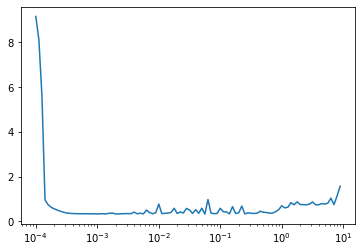

In [139]:
plt.semilogx(history.history['lr'], history.history['val_mae'])

### Model Checkpoint Callback

In [69]:
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            monitor='val_loss',
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [206]:
# creating a neural network.

# Set random seed
tf.random.set_seed(42)

# Create a  model_1
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(8,activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(1)
], name = 'model_1')

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10) # early stopping callback to stop the model for avoiding overfitting.

# Compile the model

model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=['mae'])

# Fit the model
history = model_1.fit(X_train_normal, y_train, steps_per_epoch=len(y_train), epochs=4000, verbose= 0,
            validation_data = (X_test_normal,y_test),batch_size = 32,
            callbacks=[early_stopping,create_model_checkpoint(model_name=model_1.name)])

INFO:tensorflow:Assets written to: model_experiments/model_1/assets
INFO:tensorflow:Assets written to: model_experiments/model_1/assets
INFO:tensorflow:Assets written to: model_experiments/model_1/assets
INFO:tensorflow:Assets written to: model_experiments/model_1/assets
INFO:tensorflow:Assets written to: model_experiments/model_1/assets
INFO:tensorflow:Assets written to: model_experiments/model_1/assets


In [207]:
model = tf.keras.models.load_model("model_experiments/model_1")
model_loss= model.evaluate(X_test_normal, y_test)
print(model_loss)

25/25 [==============================] - 0s 1ms/step - loss: 0.3041 - mae: 0.3041
[0.3041175305843353, 0.3041175305843353]


# Let's make prediction with Machine Learning and Deep Learning Models:

In [208]:
#Let's drop the shuffled index of targets.
y_test.reset_index(drop=True, inplace=True)

In [209]:
y_pred_reg_test = reg.predict(X_test_normal)
y_pred_rfc_test = regr.predict(X_test_normal)
y_pred_deep = model_1.predict(X_test_normal)
compare_df = pd.DataFrame(np.exp(y_pred_reg_test), columns=['Linear_Regression'])
compare_df['Random Forest'] = np.exp(y_pred_rfc_test)
compare_df['DNN'] = np.exp(y_pred_deep)
compare_df['True Targets'] = np.exp(y_test)
compare_df.head()

25/25 [==============================] - 0s 1ms/step


Linear_Regression  Random Forest           DNN  True Targets
0       44934.060670   35723.075122  43701.625000       30500.0
1       16831.382310   12281.491077  14251.182617       20500.0
2       76975.871365   41066.054138  91312.054688       88000.0
3        1292.845314    2829.238650   2319.423584        3700.0
4       18664.288883   16808.768493  10936.040039       19500.0

In [210]:
compare_df.head(19)

Linear_Regression  Random Forest           DNN  True Targets
0        44934.060670   35723.075122  43701.625000       30500.0
1        16831.382310   12281.491077  14251.182617       20500.0
2        76975.871365   41066.054138  91312.054688       88000.0
3         1292.845314    2829.238650   2319.423584        3700.0
4        18664.288883   16808.768493  10936.040039       19500.0
5         4890.971097    4682.693243   1504.198120        5300.0
6         9510.850202    6978.141968   7882.013672       11900.0
7         8492.895206    9577.269546   9136.636719        7899.0
8        46784.738797   50361.337785  53568.562500       58500.0
9         3248.248731    2206.335581   1681.186523        1700.0
10        7983.993852    7269.767121   8209.405273        6900.0
11        1268.863494    2886.705002   2457.536621        2850.0
12       37264.263130   34013.658755  31528.175781       42000.0
13        8585.170016    9591.257637   7910.500977        9555.0
14       16078.915882   14477.461330  14263.379883       11800.0
15        5948.675655    5560.635057   6645.979980        6700.0
16       66061.287291   52196.444267  47071.058594       40500.0
17       44814.115065   46587.815314  46288.421875       42700.0
18       13335.667382   11002.760488   9796.787109       11750.0

## Conclusion

Based on the results, It seems that the Random Forest Model and DNN have the best performance on the test dataset. 